In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n103        35.7086 (33.5290, 41.5921) (33.4700, 40.1950)  6.7249 (Jnode 202)\n',
 't_n104        25.0124 (19.3297, 31.4390) (19.1780, 31.2407) 12.0628 (Jnode 201)\n',
 't_n105        24.1190 (18.6291, 30.3279) (18.4979, 30.1668) 11.6690 (Jnode 200)\n',
 't_n106        21.3173 (16.4299, 26.8644) (16.2487, 26.6523) 10.4036 (Jnode 199)\n',
 't_n107        20.6651 (15.9172, 26.0540) (15.6530, 25.7509) 10.0979 (Jnode 198)\n',
 't_n108        19.4331 (14.9509, 24.5206) (14.7582, 24.2842)  9.5260 (Jnode 197)\n',
 't_n109         8.6597 ( 6.4103, 11.3266) ( 6.3024, 11.1793)  4.8769 (Jnode 196)\n',
 't_n110         8.5898 ( 6.3592, 11.2393) ( 6.2409, 11.0782)  4.8372 (Jnode 195)\n',
 't_n111         8.3564 ( 6.1850, 10.9364) ( 6.0607, 10.7696)  4.7089 (Jnode 194)\n',
 't_n112         8.0761 ( 5.9766, 10.5698) ( 5.8336, 10.3924)  4.5589 (Jnode 193)\n',
 't_n113         7.7145 ( 5.7058, 10.0997) ( 5.6153,  9.9789)  4.3635 (Jnode 192)\n',
 't_n114         5.6474 ( 4.1243,  7.4959) ( 4.0174,  

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [20]:
posterior_mean_iqtree

[35.7086,
 25.0124,
 24.119,
 21.3173,
 20.6651,
 19.4331,
 8.6597,
 8.5898,
 8.3564,
 8.0761,
 7.7145,
 5.6474,
 3.9971,
 3.0453,
 1.5503,
 5.8909,
 5.0651,
 8.0062,
 5.2609,
 7.6803,
 6.1312,
 4.9739,
 4.0529,
 7.4326,
 7.0091,
 1.7982,
 8.2329,
 7.4289,
 5.6809,
 4.5171,
 5.1208,
 4.6558,
 3.8935,
 3.6035,
 18.0872,
 14.2457,
 19.6396,
 17.8498,
 16.5566,
 13.5234,
 6.9984,
 13.0123,
 11.3955,
 10.1254,
 8.6405,
 16.0647,
 14.7101,
 3.0746,
 1.3323,
 22.562,
 21.176,
 19.069,
 18.4009,
 19.8224,
 12.9937,
 16.1889,
 12.768,
 24.201,
 22.5927,
 20.4077,
 19.2512,
 16.2567,
 10.7542,
 14.3779,
 20.0915,
 5.923,
 20.2599,
 11.7475,
 11.3556,
 11.0665,
 10.4186,
 9.5282,
 9.0763,
 8.7411,
 8.347,
 7.4184,
 6.4154,
 5.3432,
 7.544,
 7.1072,
 5.642,
 6.4127,
 8.193,
 7.5557,
 6.986,
 5.9752,
 4.1298,
 7.7291,
 6.9405,
 6.1384,
 9.0551,
 8.5942,
 8.1493,
 7.2126,
 5.2863,
 8.0857,
 4.44,
 3.5524,
 1.3153,
 11.3323,
 9.6113]

In [21]:
lower_ci_iqtree

[]

In [22]:
upper_ci_iqtree

[]

In [23]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [25]:
posterior_mean_baseml

[35.4428,
 26.2957,
 24.708,
 21.78,
 20.8227,
 18.7863,
 9.1136,
 8.9865,
 8.5195,
 8.0529,
 7.5901,
 5.5121,
 3.9087,
 2.861,
 1.6648,
 5.8462,
 4.8028,
 8.0323,
 5.2038,
 7.5886,
 5.9668,
 4.7368,
 4.3,
 7.4433,
 6.8605,
 2.1858,
 8.4189,
 7.4002,
 5.6514,
 4.4458,
 5.1561,
 4.5288,
 3.6605,
 4.0267,
 17.1952,
 13.9494,
 19.4089,
 17.3118,
 15.5703,
 12.6036,
 6.9625,
 12.4279,
 10.4705,
 8.997,
 7.3892,
 15.4958,
 13.8787,
 3.8302,
 1.7469,
 22.0589,
 19.9927,
 17.2617,
 16.9148,
 18.8996,
 12.5646,
 15.4163,
 11.6833,
 25.2414,
 23.2731,
 20.6133,
 18.8796,
 15.9658,
 11.2576,
 13.696,
 20.1225,
 7.5663,
 20.433,
 14.8422,
 13.859,
 13.027,
 12.0391,
 10.783,
 10.0913,
 9.4916,
 8.7602,
 7.5529,
 6.3517,
 5.2382,
 7.7397,
 7.1413,
 5.5927,
 6.0998,
 8.7217,
 7.8006,
 6.9402,
 5.8201,
 4.0176,
 7.9074,
 6.9804,
 5.9702,
 9.8905,
 9.0734,
 8.2366,
 7.0344,
 4.9102,
 8.5153,
 5.785,
 4.4349,
 1.7646,
 14.163,
 11.8534]

In [26]:
posterior_mean_iqtree

[35.7086,
 25.0124,
 24.119,
 21.3173,
 20.6651,
 19.4331,
 8.6597,
 8.5898,
 8.3564,
 8.0761,
 7.7145,
 5.6474,
 3.9971,
 3.0453,
 1.5503,
 5.8909,
 5.0651,
 8.0062,
 5.2609,
 7.6803,
 6.1312,
 4.9739,
 4.0529,
 7.4326,
 7.0091,
 1.7982,
 8.2329,
 7.4289,
 5.6809,
 4.5171,
 5.1208,
 4.6558,
 3.8935,
 3.6035,
 18.0872,
 14.2457,
 19.6396,
 17.8498,
 16.5566,
 13.5234,
 6.9984,
 13.0123,
 11.3955,
 10.1254,
 8.6405,
 16.0647,
 14.7101,
 3.0746,
 1.3323,
 22.562,
 21.176,
 19.069,
 18.4009,
 19.8224,
 12.9937,
 16.1889,
 12.768,
 24.201,
 22.5927,
 20.4077,
 19.2512,
 16.2567,
 10.7542,
 14.3779,
 20.0915,
 5.923,
 20.2599,
 11.7475,
 11.3556,
 11.0665,
 10.4186,
 9.5282,
 9.0763,
 8.7411,
 8.347,
 7.4184,
 6.4154,
 5.3432,
 7.544,
 7.1072,
 5.642,
 6.4127,
 8.193,
 7.5557,
 6.986,
 5.9752,
 4.1298,
 7.7291,
 6.9405,
 6.1384,
 9.0551,
 8.5942,
 8.1493,
 7.2126,
 5.2863,
 8.0857,
 4.44,
 3.5524,
 1.3153,
 11.3323,
 9.6113]

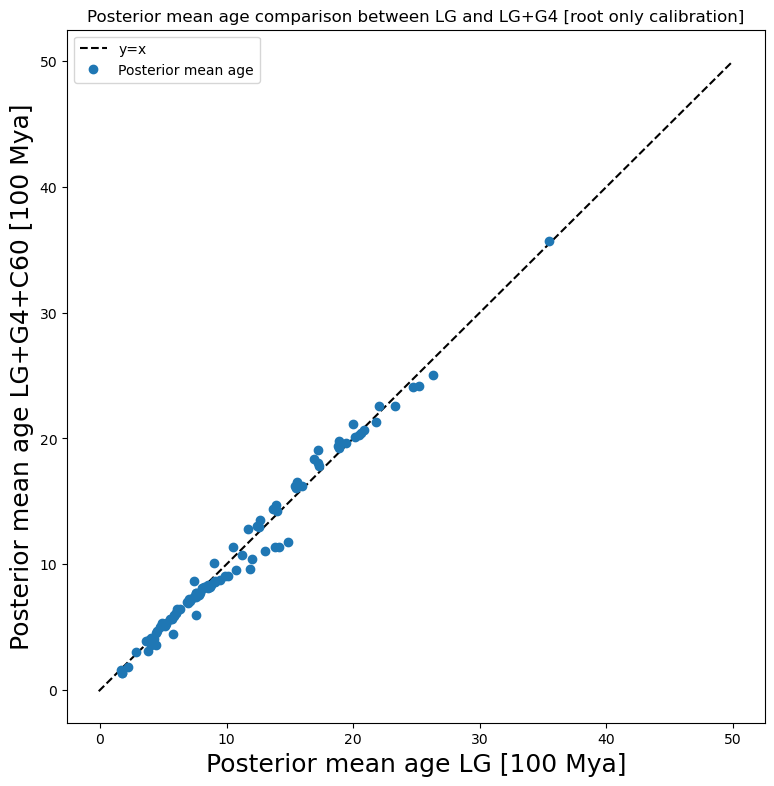

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [root only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_ro_scatter.png')

In [28]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')